In [20]:
import librosa
import numpy as np
import scipy.io
import scipy
import matplotlib.pyplot as plt
import seaborn
from IPython.display import Audio

seaborn.set(style='ticks')

In [21]:
signal_array = []

signaal1, sr1 = librosa.load("output1.wav")
signaal2, sr2 = librosa.load("output2.wav")
signaal3, sr3 = librosa.load("output3.wav")
signaal4, sr4 = librosa.load("output4.wav")
signaal5, sr5 = librosa.load("output1-1.wav")
signaal6, sr6 = librosa.load("output1-2.wav")
signaal7, sr7 = librosa.load("output1-3.wav")
signaal8, sr8 = librosa.load("output1-4.wav")

signal_array.append(signaal1)
signal_array.append(signaal2)
signal_array.append(signaal3)
signal_array.append(signaal4)
signal_array.append(signaal5)
signal_array.append(signaal6)
signal_array.append(signaal7)
signal_array.append(signaal8)

In [22]:
noise, sr9 = librosa.load("noise.wav")

<h2>Manual method 1</h2>

In [23]:
snr_list = []
counter = 0
for sig in signal_array:
    noise_free_power = np.mean(np.square(noise))
    signal_power = np.mean(np.square(sig))

    snr = 10 * np.log10((signal_power-noise_free_power)/noise_free_power)
    counter = counter + 1
    snr_list.append(snr)
    print(f"SNR value for the recording number {counter}  (dB):", snr)


SNR value for the recording number 1  (dB): 34.73853349685669
SNR value for the recording number 2  (dB): 35.119922161102295
SNR value for the recording number 3  (dB): 34.43244934082031
SNR value for the recording number 4  (dB): 29.926717281341553
SNR value for the recording number 5  (dB): 39.65415000915527
SNR value for the recording number 6  (dB): 32.49800682067871
SNR value for the recording number 7  (dB): 30.06779432296753
SNR value for the recording number 8  (dB): 31.918082237243652


<h2>Manual method 2</h2>

In [24]:
def snr_simple(signal_list):
    snr_ratio_list = []
    for sig in signal_list:
        signal = np.sum(np.square(sig)) / len(sig)
        noise = np.mean(np.square(signal))

        snr_ratio = 10 * np.log10(signal/noise)
        snr_ratio_list.append(snr_ratio)
        
    return snr_ratio_list

final_arr_snr = snr_simple(signal_array)

print(final_arr_snr)
for i in final_arr_snr:
    print(f"Signal-to-Noise Ratio (SNR): {i} dB")

[27.360760082731236, 26.97949463094085, 27.66673875200443, 32.169620203845824, 22.44613195051234, 29.600303933488586, 32.02868414758367, 30.17987920044944]
Signal-to-Noise Ratio (SNR): 27.360760082731236 dB
Signal-to-Noise Ratio (SNR): 26.97949463094085 dB
Signal-to-Noise Ratio (SNR): 27.66673875200443 dB
Signal-to-Noise Ratio (SNR): 32.169620203845824 dB
Signal-to-Noise Ratio (SNR): 22.44613195051234 dB
Signal-to-Noise Ratio (SNR): 29.600303933488586 dB
Signal-to-Noise Ratio (SNR): 32.02868414758367 dB
Signal-to-Noise Ratio (SNR): 30.17987920044944 dB


<h2>Speech recognition</h2>

In [25]:
import speech_recognition as sr
r = sr.Recognizer()

In [26]:
sound = sr.AudioFile('output1-4.wav')

with sound as source:
    audio = r.record(source)
r.recognize_google(audio)

'hello I need some help could you please help me'

<h2>Visual data representation</h2>

In [27]:
distance_points = [0.5,1.0,1.5,2.0,2.5,3.0,3.5,4]


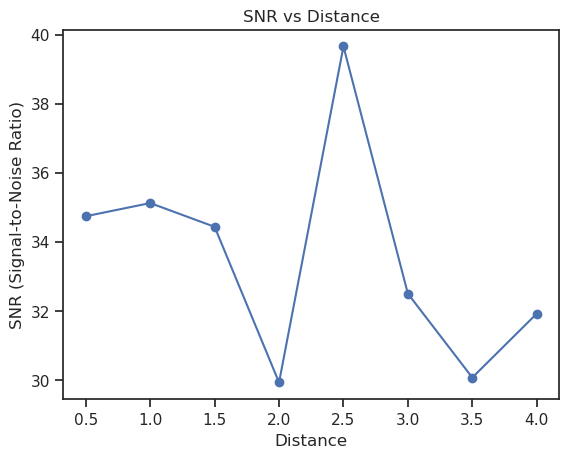

In [28]:
# Plotting
plt.plot(distance_points, snr_list, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('Distance')
plt.ylabel('SNR (Signal-to-Noise Ratio)')
plt.title('SNR vs Distance')

# Display the plot
plt.show()